# Assi 6


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score,accuracy_score

In [36]:
df=pd.read_csv("diabetes.csv")

In [37]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
df.shape

(768, 9)

In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
#replace zeros
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [41]:
df["Glucose"]

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [42]:
#split dataset
X=df.iloc[:,0:8]
y=df.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [43]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [44]:
#feature Scaling
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)

X_test=sc_X.transform(X_test)

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
y_pred=decision_tree.predict(X_test)

In [48]:
#Evaluate The Model
cf_matrix=confusion_matrix(y_test,y_pred)

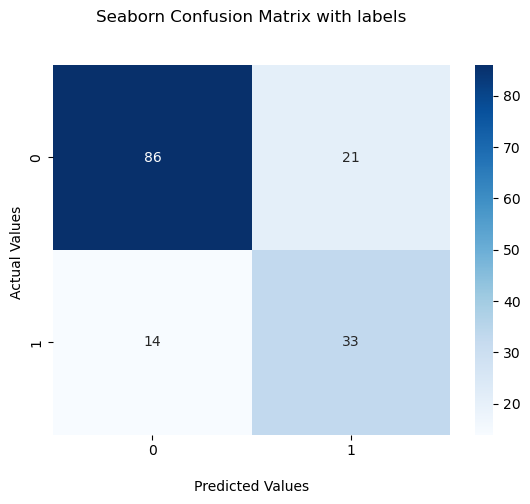

In [49]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


## Display the visualization of the Confusion Matrix.
plt.show()

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred ).ravel()
tn, fp, fn, tp


(86, 21, 14, 33)

In [51]:
#The accuracy rate is equal to (tn+tp)/(tn+tp+fn+fp)
accuracy=accuracy_score(y_test,y_pred)
accuracy*100

77.27272727272727

In [52]:
#The precision is the ratio of tp/(tp + fp)
precision_score(y_test,y_pred)

0.6111111111111112

In [53]:
##The recall is the ratio of tp/(tp + fn)
recall_score(y_test,y_pred)

0.7021276595744681

In [54]:
#error rate=1-accuracy which is lies bertween 0 and 1
error_rate=1-accuracy_score(y_test,y_pred)
error_rate*100

22.72727272727273